In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Memasukan Dataset
df = pd.read_csv('spotify-2023.csv', encoding='latin1')

In [ ]:
# memeriksa tipe daata disetiap kolom
print("Initial Data Types:")
print(df.dtypes)
# memeriksa missing values atau data yang hilang
print("\nMissing Values:")
print(df.isnull().sum())

Initial Data Types:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
popularity               int64
dtype: object

Missing Values:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_p

In [ ]:
# membersihkan kolom dataframe
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
# menghapus barais terebut
df = df.drop(index=574)

In [ ]:
# mengkonversi kolom streams menjadi tipe numerik
df['streams'] = pd.to_numeric(df['streams'])

In [ ]:
# membuat target biner
median_streams = df['streams'].median()
df['popularity'] = (df['streams'] > median_streams).astype(int)

In [ ]:
# melihat deskripsi statistik
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       artist_count  released_year  released_month  released_day  \
count    952.000000     952.000000      952.000000    952.000000   
mean       1.556723    2018.288866        6.038866     13.944328   
std        0.893331      11.011397        3.564571      9.197223   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts       streams  \
count            952.000000         952.000000  9.520000e+02   
mean            5202.565126          12.022059  5.141374e+08   
std             7901.400683          19.582405  5.668569e+08   
min               31.000000           0.000000  2.762000e+03   
25%              874.500000           0.000000

In [ ]:
# Correlation matriks untuk kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

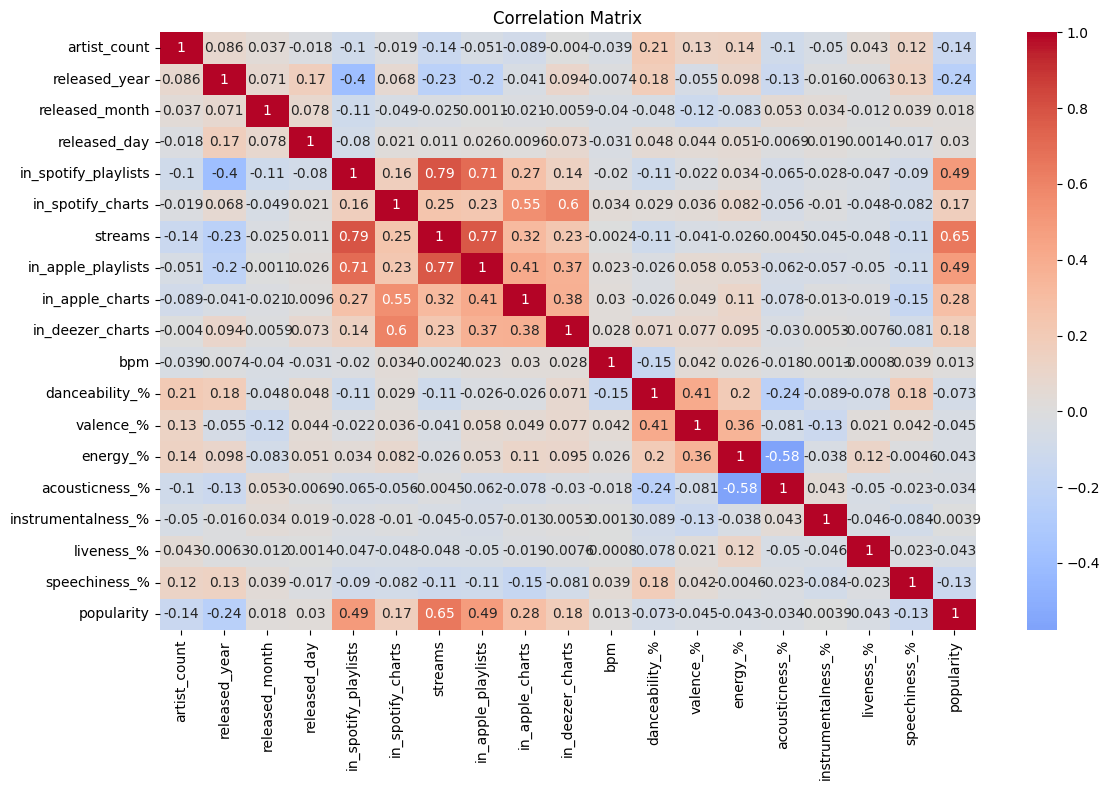

In [ ]:
# Menampilkan heatmap untuk matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

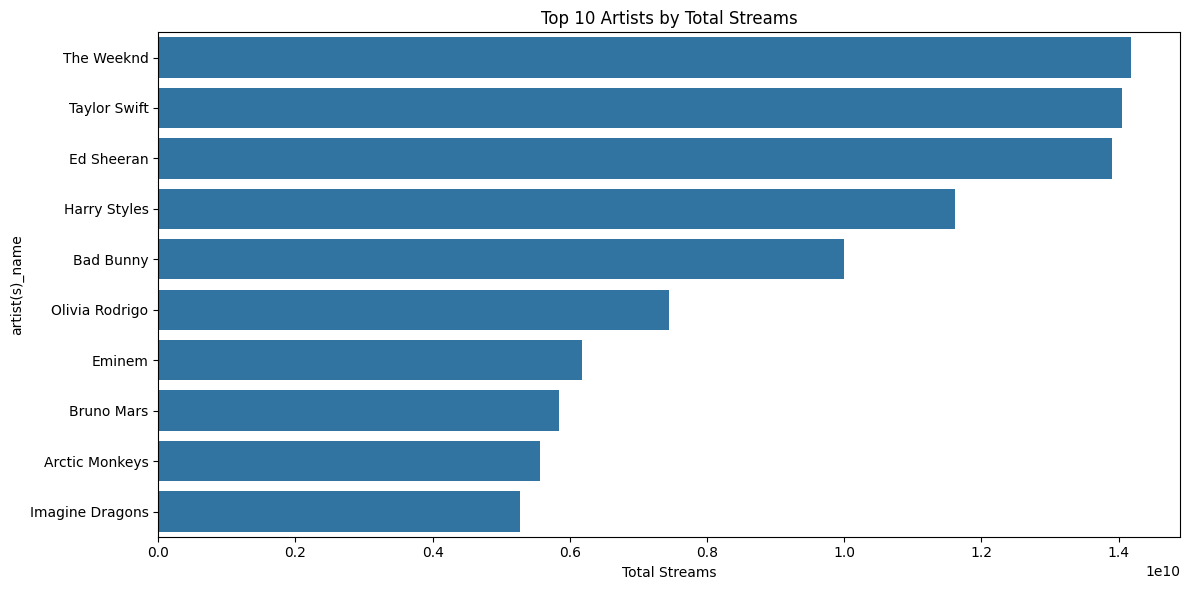

In [ ]:
# Membuat grafik batang untuk 10 artis teratas berdasarkan jumlah streams terbanyak
plt.figure(figsize=(12, 6))
df_top_artists = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=df_top_artists.values, y=df_top_artists.index)
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Total Streams')
plt.tight_layout()
plt.show()

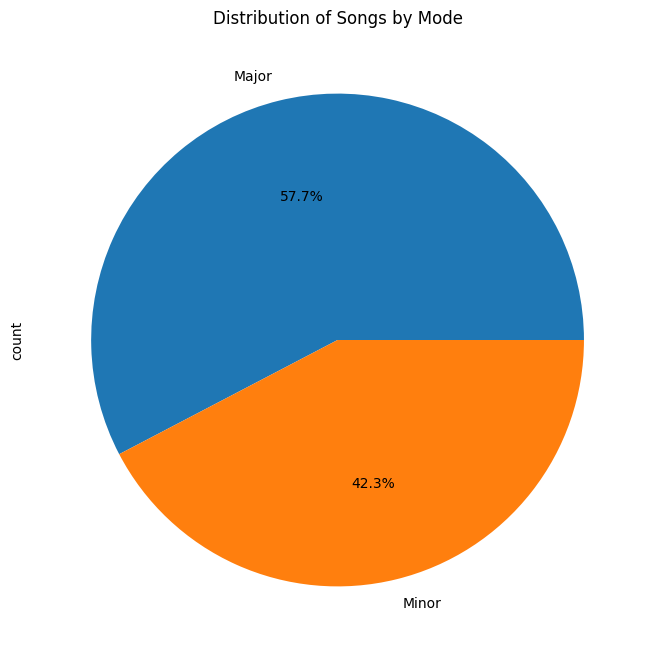

In [ ]:
# # Membuat grafik pie untuk distribusi mode
plt.figure(figsize=(8, 8))
df['mode'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Songs by Mode')
plt.show()

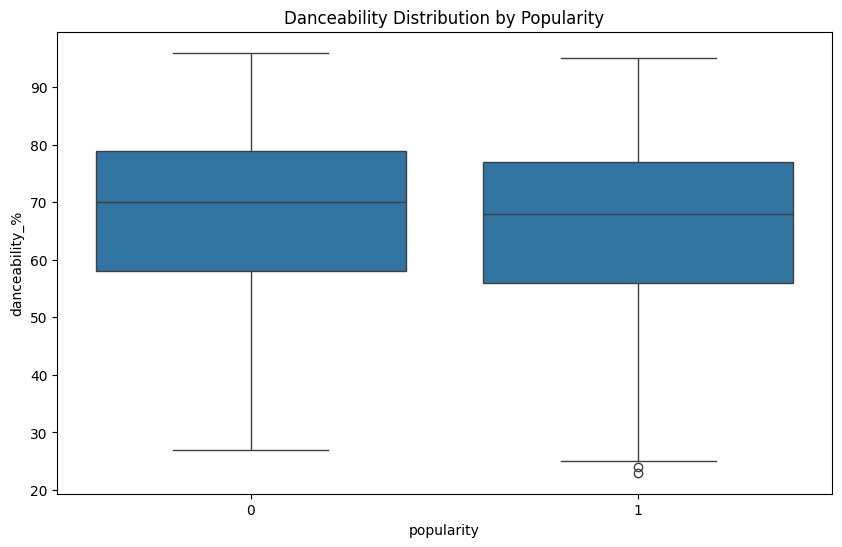

In [ ]:
# Membuat box plot untuk distribusi danceability berdasarkan popularitas
plt.figure(figsize=(10, 6))
sns.boxplot(x='popularity', y='danceability_%', data=df)
plt.title('Danceability Distribution by Popularity')
plt.show()

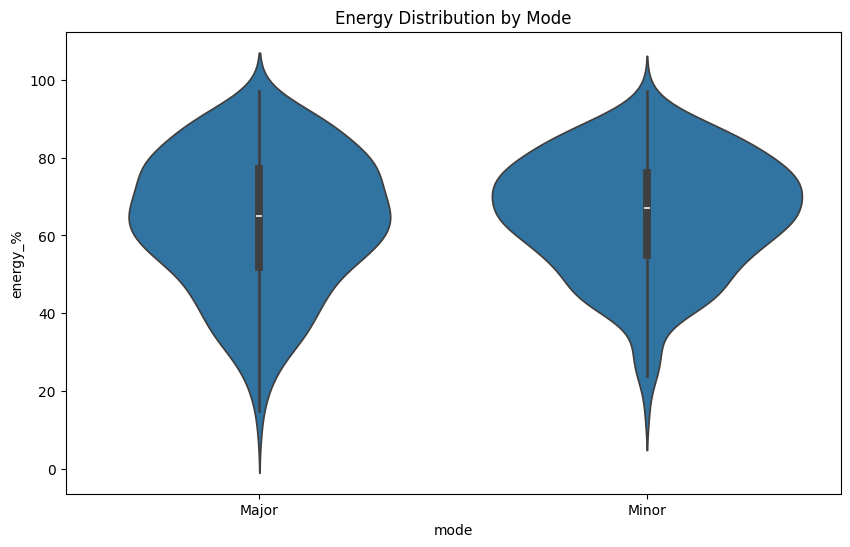

In [ ]:
# Membuat violin plot untuk distribusi energi
plt.figure(figsize=(10, 6))
sns.violinplot(x='mode', y='energy_%', data=df)
plt.title('Energy Distribution by Mode')
plt.show()

In [ ]:
# Memilih fitur yang akan digunakan dalam pemodelan
features = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'liveness_%', 'speechiness_%']
X = df[features]
y = df['popularity']

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Memilih fitur teratas menggunakan nilai F dari ANOVA
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = [features[i] for i in selector.get_support(indices=True)]

In [ ]:
# Menampilkan features
print("\nSelected Features:", selected_features)
print("\nFeature Scores:", selector.scores_)


Selected Features: ['danceability_%', 'valence_%', 'liveness_%', 'speechiness_%']

Feature Scores: [ 5.15755732  1.72622235  1.91852976  1.0885648   1.75176972 16.04826588]


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

In [ ]:
# Train QDA model for comparison
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

In [ ]:
# Confusion Matrix for LDA
cm_lda = confusion_matrix(y_test, y_pred_lda)
print("\nLDA Confusion Matrix:")
print(cm_lda)
print("\nLDA Classification Report:")
print(classification_report(y_test, y_pred_lda))


LDA Confusion Matrix:
[[40 59]
 [40 52]]

LDA Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.45        99
           1       0.47      0.57      0.51        92

    accuracy                           0.48       191
   macro avg       0.48      0.48      0.48       191
weighted avg       0.48      0.48      0.48       191



In [ ]:
# Confusion Matrix for QDA
cm_qda = confusion_matrix(y_test, y_pred_qda)
print("\nQDA Confusion Matrix:")
print(cm_qda)
print("\nQDA Classification Report:")
print(classification_report(y_test, y_pred_qda))


QDA Confusion Matrix:
[[33 66]
 [28 64]]

QDA Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.33      0.41        99
           1       0.49      0.70      0.58        92

    accuracy                           0.51       191
   macro avg       0.52      0.51      0.49       191
weighted avg       0.52      0.51      0.49       191

